<a href="https://colab.research.google.com/github/a1kushala/Mani-Online-Event-Management-System-Project/blob/main/Data_Science_Intern_Assignment_Algorithmic_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1
Download the data

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn seaborn xgboost


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


Download and Preprocess Data

In [3]:
import yfinance as yf
stock_data = yf.download("AAPL", start="2021-01-01", end="2024-01-01")
stock_data.reset_index(inplace=True)
stock_data.head()
stock_data.fillna(method='ffill', inplace=True)  # Forward fill missing values
stock_data.dropna(inplace=True)  # Drop remaining NaN rows if any


[*********************100%***********************]  1 of 1 completed
<ipython-input-3-08547fe951fb>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)  # Forward fill missing values


 Perform Feature Engineering

In [4]:
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()
def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

stock_data['RSI'] = compute_rsi(stock_data['Close'])
stock_data['EMA12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
stock_data['EMA26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26']
stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)


 Visualize Data

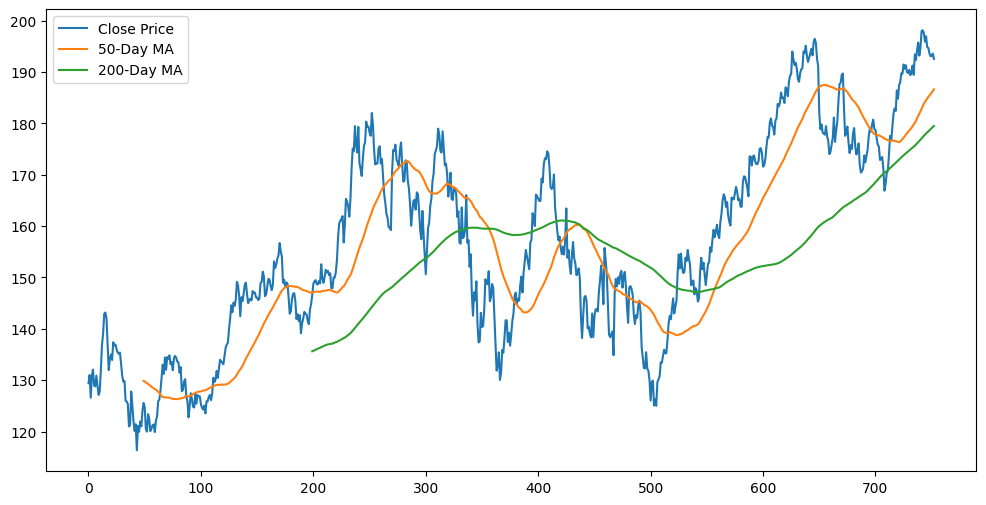

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA50'], label='50-Day MA')
plt.plot(stock_data['MA200'], label='200-Day MA')
plt.legend()
plt.show()


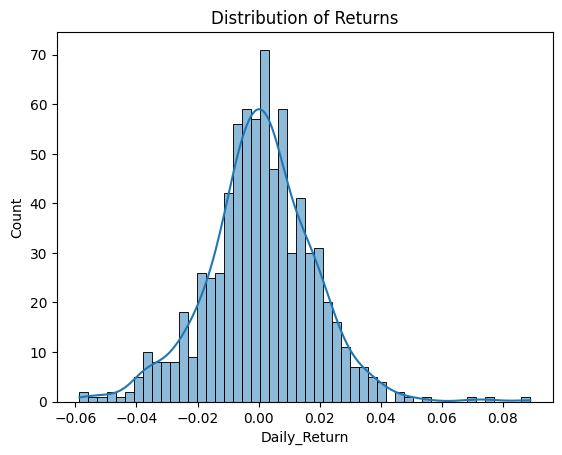

In [6]:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()
sns.histplot(stock_data['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Returns')
plt.show()


Task-2
 a Predictive Model using random forest and Evaluating

In [8]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
features = ['MA50', 'MA200', 'RSI', 'MACD', 'Volume']
combined_data = stock_data[features + ['Target']].dropna()
X = combined_data[features]
y = combined_data['Target']
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Shape of X: (554, 5)
Shape of y: (753,)
Missing values in X: 0
Missing values in y: 0
Accuracy: 0.5045045045045045
Precision: 0.6122448979591837
Recall: 0.45454545454545453
F1-Score: 0.5217391304347826
Confusion Matrix:
 [[26 19]
 [36 30]]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Feature selection
features = ['MA50', 'MA200', 'RSI', 'MACD', 'Volume']
X = stock_data[features].dropna()
y = stock_data['Target'].dropna()

# Align X and y to avoid mismatched indices
X, y = X.align(y, join='inner', axis=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Accuracy: 0.40540540540540543
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Feature selection
features = ['MA50', 'MA200', 'RSI', 'MACD', 'Volume']
X = stock_data[features].dropna()
y = stock_data['Target'].dropna()

# Align X and y to avoid mismatched indices
X, y = X.align(y, join='inner', axis=0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6216216216216216
Precision: 0.7307692307692307
Recall: 0.5757575757575758
F1-Score: 0.6440677966101694
Confusion Matrix:
 [[31 14]
 [28 38]]


The accuray is more for XGBOOST when compared to the random forest and the logistic regression

task-3
Python code for backtesting

Initial Capital: $10000.00
Final Portfolio Value: $20270.11
Net Profit: $10270.11


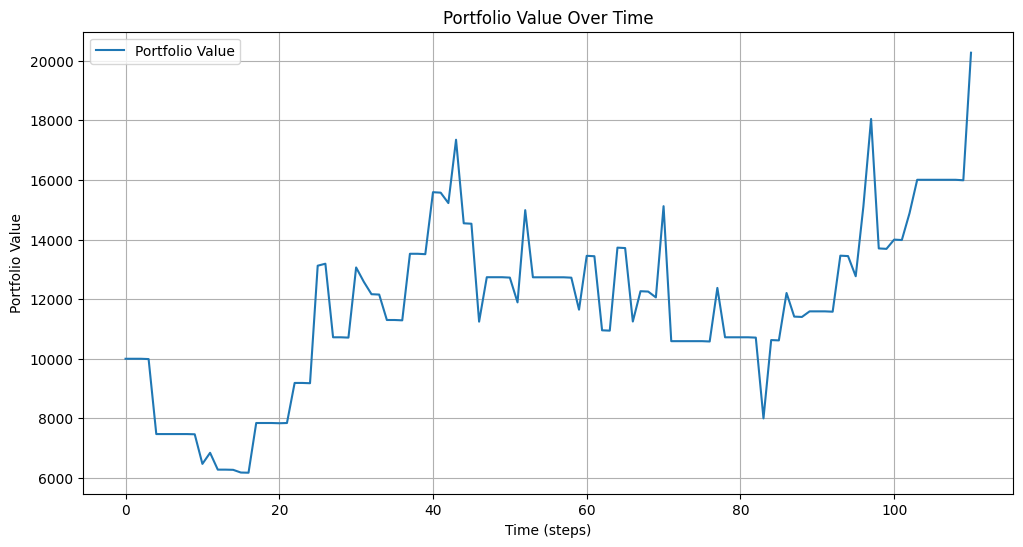

In [30]:
close_test = stock_data.loc[X_test.index, 'Close']

# Initialize variables
initial_cash = 10000  # Starting capital
cash = initial_cash
position = 0  # Number of shares held
transaction_cost = 0.001  # 0.1% transaction cost
portfolio_values = []  # Store portfolio value at each step

for i in range(len(X_test)):
    # Access the 'Close' price directly using .iloc[i]
    price = close_test.iloc[i].item()  # Changed line

    # Check if the 'Close' price is valid
    if price <= 0:
        continue

    # Buy signal
    if y_pred[i] == 1 and cash > 0:
        shares_to_buy = cash / price
        transaction_cost_amount = shares_to_buy * price * transaction_cost
        position = shares_to_buy
        cash -= (shares_to_buy * price + transaction_cost_amount)

    # Sell signal
    elif y_pred[i] == 0 and position > 0:
        transaction_cost_amount = position * price * transaction_cost
        cash += (position * price - transaction_cost_amount)
        position = 0

    # Calculate and store portfolio value
    current_value = cash + (position * price)
    portfolio_values.append(current_value)

# Final portfolio value
final_portfolio_value = cash + (position * close_test.iloc[-1].item() if position > 0 else 0)  # Changed to ensure consistency

# Print results
print(f"Initial Capital: ${initial_cash:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Net Profit: ${final_portfolio_value - initial_cash:.2f}")

# Optional: Plot portfolio value over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.show()

Task-4
Optimization and refinement

In [10]:
#grid search or random search to optimize model parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'n_estimators': 50}


In [11]:
# LSTM for time-series
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
